In [2]:
import pandas as pd
import numpy as np

In [157]:
path = '/Users/francobenko/Documents/DataSets/Implementacion RegLin/income.data.csv'

In [158]:
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def split(self, percentage):
        train_data = np.random.permutation(self.dataset)[:int(self.dataset.shape[0]*percentage),:self.dataset.shape[1]]
        test_data = np.random.permutation(self.dataset[~(np.isin(self.dataset,train_data).sum(axis=1)==3),:])[:int(self.dataset.shape[0]*(1-percentage)),:self.dataset.shape[1]]
        return train_data, test_data


    def _build_dataset(self, path):
        data = np.genfromtxt(path, dtype=None, names=True, delimiter=',', encoding=None)
        return data.reshape(data.shape[0],1)

In [159]:
data = Data(path)

In [160]:
data.dataset.shape

(498, 1)

In [161]:
data.dataset[:5]

array([[('"1"', 3.86264742, 2.31448898)],
       [('"2"', 4.97938138, 3.43348976)],
       [('"3"', 4.92395694, 4.5993734 )],
       [('"4"', 3.21437244, 2.7911138 )],
       [('"5"', 7.19640925, 5.59639827)]],
      dtype=[('f0', '<U5'), ('income', '<f8'), ('happiness', '<f8')])

In [162]:
train_data, test_data = data.split(0.8)

In [9]:
train_data.shape

(398, 1)

In [10]:
test_data.shape

(99, 1)

In [226]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        constante = np.mean(Y)
        self.model = constante


    def predict(self, X):
        y_hat = self.model
        return y_hat


class LinearRegression(BaseModel):

    def fit(self, X, Y):
        W = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))
        self.model = W
        print('Calculo W = {}'.format(W))

    def predict(self, X):
        y_hat = self.model.T*X
        return y_hat

class LinearRegressionB(BaseModel):

    def fit(self, X, Y):
        X_ = np.ones((X.shape[0],X.shape[1]+1))
        X_[:,:-1] = X
        W = np.matmul(np.linalg.inv(np.matmul(X_.T,X_)),np.matmul(X_.T,Y))
        self.model = W
        print('Calculo W= {}'.format(W))

    def predict(self, X):
        y_hat = self.model[0]*X+self.model[1]
        return y_hat
    
    
class PolinomialRegression(BaseModel):
    
    def __init__(self):
        self.n = 1
    
    def fit(self, n, X, Y):
        
        self.n = n
        
        X_ = np.ones((X.shape[0],X.shape[1]*self.n+1))

        ini = 1

        for i in range(1,self.n+1):
            fin = X.shape[1]*i+1
            X_[:,ini:fin] = X**i
            ini = fin
           
        W = np.matmul(np.linalg.inv(np.matmul(X_.T,X_)),np.matmul(X_.T,Y))
        self.model = W
        print('Calculo W= {}'.format(W))

    def predict(self, X):
        
        X_ = np.ones((X.shape[0],X.shape[1]*self.n+1))

        ini = 1

        for i in range(1,self.n+1):
            fin = X.shape[1]*i+1
            X_[:,ini:fin] = X**i
            ini = fin
            
        y_hat = np.sum(X_.T*self.model, axis=0)
        return y_hat
    

**Linear Regression**

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(train_data['income'],train_data['happiness'])

Calculo W = [[0.75392606]]


In [44]:
y_hat = lr.predict(test_data['income'])

**Linear regression with b**

In [45]:
lrb = LinearRegressionB()

In [46]:
lrb.fit(train_data['income'],train_data['happiness'])

Calculo W= [[0.73630464]
 [0.09109385]]


In [47]:
yb_hat = lrb.predict(test_data['income'])

**Error**

In [48]:
class Metric(object):
    
    def MSE(self, Y, y_hat):
        mean_sq_err = np.mean(np.sqrt((Y-y_hat)**2))
        return mean_sq_err
    

In [49]:
metric = Metric()

In [50]:
lr_mse = metric.MSE(test_data['happiness'], y_hat)
lr_mse

0.5830609460244032

In [51]:
lrb_mse = metric.MSE(test_data['happiness'], yb_hat)
lrb_mse

0.5850218619602469

**Plots**

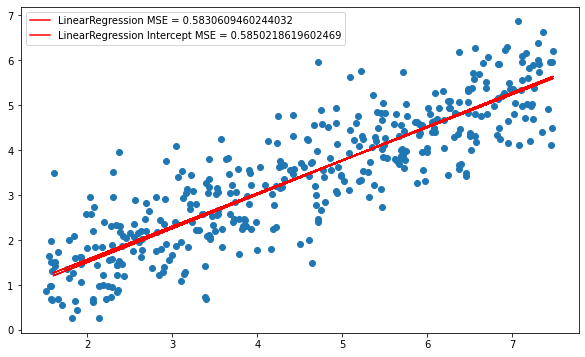

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,6))

plt.scatter(train_data['income'],train_data['happiness'])
plt.plot(test_data['income'], y_hat, color='r', label='LinearRegression MSE = {}'.format(lr_mse))
plt.plot(test_data['income'], yb_hat, color='r', label='LinearRegression Intercept MSE = {}'.format(lrb_mse))

plt.legend()

**Shift Data**

In [163]:
data.dataset['income'] = data.dataset['income'] + np.ones(data.dataset[['income','happiness']].shape)*5
data.dataset['happiness'] = data.dataset['happiness'] + np.ones(data.dataset[['income','happiness']].shape)*5


In [164]:
train_data, test_data = data.split(0.8)


In [165]:
lr.fit(train_data['income'],train_data['happiness'])


Calculo W = [[0.87471015]]


In [166]:
y_hat = lr.predict(test_data['income'])


In [167]:
lrb.fit(train_data['income'],train_data['happiness'])


Calculo W= [[0.71738881]
 [1.55178733]]


In [168]:
yb_hat = lrb.predict(test_data['income'])


In [169]:
lr_mse = metric.MSE(test_data['happiness'], y_hat)
lr_mse


0.6207611990959151

In [170]:
lrb_mse = metric.MSE(test_data['happiness'], yb_hat)
lrb_mse


0.5985926184622689

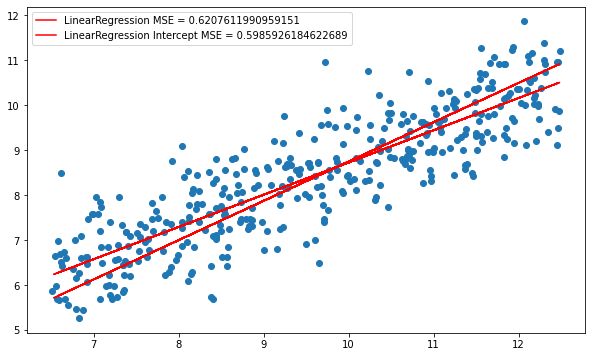

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,6))

plt.scatter(train_data['income'],train_data['happiness'])
plt.plot(test_data['income'], y_hat, color='r', label='LinearRegression MSE = {}'.format(lr_mse))
plt.plot(test_data['income'], yb_hat, color='r', label='LinearRegression Intercept MSE = {}'.format(lrb_mse))

plt.legend()

**Experimento con data random**

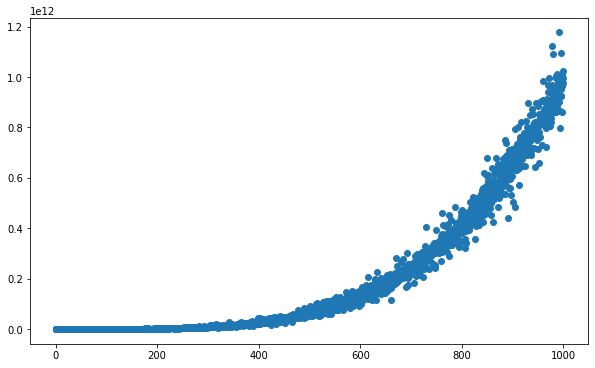

In [278]:
ones = np.ones((1000,1))

X = np.ones((3000,1))
X[0:1000,:] = np.array(range(0,1000)).reshape(1000,1)
X[1000:2000,:] = np.array(range(0,1000)).reshape(1000,1)
X[2000:3000,:] = np.array(range(0,1000)).reshape(1000,1)

Y = np.ones((3000,1))
Y[0:1000,:] = X[0:1000,:]**4
Y[1000:2000,:] = (X[0:1000,:]-np.random.normal(0,1,(1000,1))*10)**4
Y[2000:3000,:] = (X[0:1000,:]+np.random.normal(0,1,(1000,1))*25)**4




fig = plt.figure(figsize=(10,6))
plt.scatter(X,Y)
#plt.plot(prue[800:1000,0:1], (prue[800:1000,1:2])**2, color='r', label='true val')
#plt.plot(prue[800:1000,0:1], y_lcb_hat, color='g', label='cuadratic')


**Split**

In [279]:
rand_mask_train = np.random.permutation(np.array(range(0,3000)))[:2400]

rand_mask_test = ~(np.isin(A,rand_mask))


In [280]:
X_train = X[rand_mask_train]
Y_train = Y[rand_mask_train]

X_test = X[rand_mask_test]
Y_test = Y[rand_mask_test]


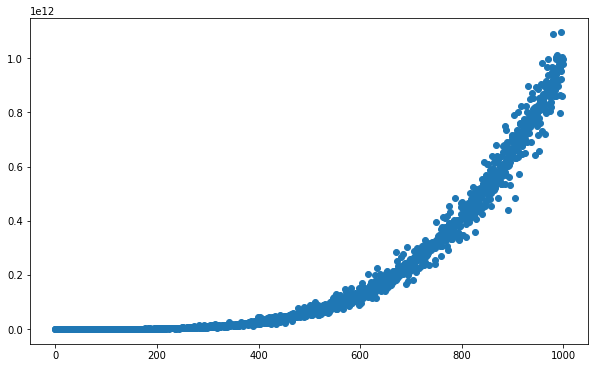

In [281]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X_train,Y_train)


In [282]:
lcb = LinearCuadraticRegressionB()
lcb.fit(X_train,Y_train)


Calculo W= [[ 1.70606393e+06]
 [-9.08077936e+08]
 [ 8.52269191e+10]]


In [283]:
y_lcb_hat = lcb.predict(X_test)


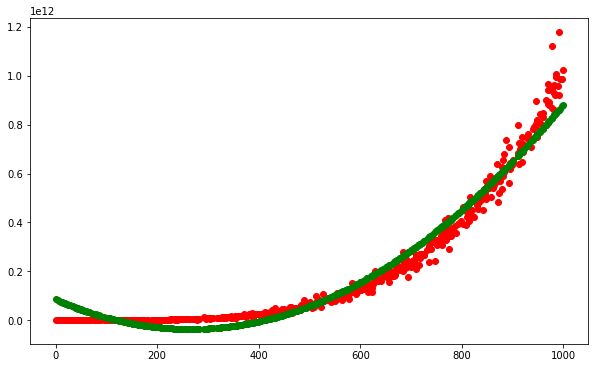

In [284]:
fig = plt.figure(figsize=(10,6))
#plt.scatter(X,Y)
plt.scatter(X_test, Y_test, color='r', label='true val')
plt.scatter(X_test, y_lcb_hat, color='g', label='cuadratic')


In [261]:
clrb_mse = metric.MSE(Y_test, y_lcb_hat)
clrb_mse


20516375.545067128

**Polynomial Regression**

- Grado 2

In [289]:
poly2 = PolinomialRegression()
poly2.fit(2,X_train,Y_train)


Calculo W= [[ 8.52269191e+10]
 [-9.08077936e+08]
 [ 1.70606393e+06]]


In [290]:
y_poly2_hat = poly2.predict(X_test)

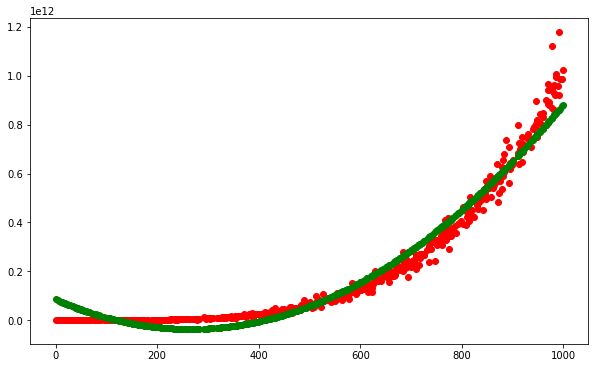

In [291]:
fig = plt.figure(figsize=(10,6))
#plt.scatter(X,Y)
plt.scatter(X_test, Y_test, color='r', label='true val')
plt.scatter(X_test, y_poly2_hat, color='g', label='PolynomialRegression')

In [292]:
y_poly2_train_hat = poly.predict(X_train)

polyr2_mse_train = metric.MSE(Y_train, y_poly2_train_hat)
polyr2_mse_train

276061052264.1399

In [293]:
polyr2_mse_test = metric.MSE(Y_test, y_poly2_hat)
polyr2_mse_test

271449844226.8667

- Grado 3

In [294]:
poly3 = PolinomialRegression()
poly3.fit(3,X_train,Y_train)

Calculo W= [[-1.29283015e+10]
 [ 2.66471532e+08]
 [-1.22817371e+06]
 [ 1.95654282e+03]]


In [295]:
y_poly3_hat = poly3.predict(X_test)

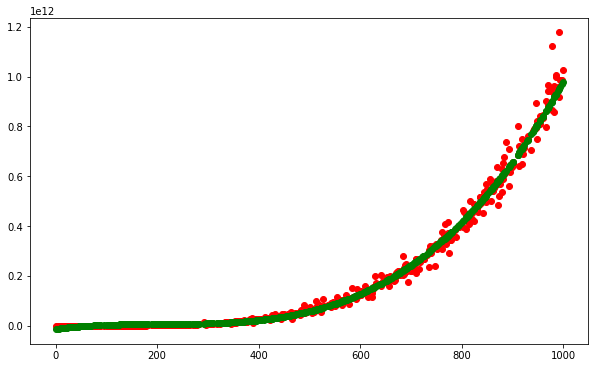

In [296]:
fig = plt.figure(figsize=(10,6))

plt.scatter(X_test, Y_test, color='r', label='true val')
plt.scatter(X_test, y_poly3_hat, color='g', label='PolynomialRegression')

In [297]:
y_poly3_train_hat = poly3.predict(X_train)

polyr3_mse_train = metric.MSE(Y_train, y_poly3_train_hat)
polyr3_mse_train

268765772832.88672

In [299]:
polyr3_mse_test = metric.MSE(Y_test, y_poly3_hat)
polyr3_mse_test

264273530917.03528

- Grado 4

In [300]:
poly4 = PolinomialRegression()
poly4.fit(4,X_train,Y_train)

Calculo W= [[-1.67802170e+09]
 [ 4.06420398e+07]
 [-2.12561704e+05]
 [ 3.77298768e+02]
 [ 7.89747070e-01]]


In [301]:
y_poly4_hat = poly4.predict(X_test)

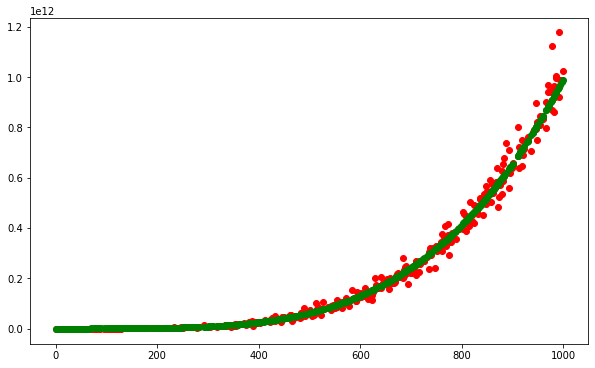

In [302]:
fig = plt.figure(figsize=(10,6))

plt.scatter(X_test, Y_test, color='r', label='true val')
plt.scatter(X_test, y_poly4_hat, color='g', label='PolynomialRegression')

In [303]:
y_poly4_train_hat = poly4.predict(X_train)

polyr4_mse_train = metric.MSE(Y_train, y_poly4_train_hat)
polyr4_mse_train

268643984161.23187

In [304]:
polyr4_mse_test = metric.MSE(Y_test, y_poly4_hat)
polyr4_mse_test

264143418986.53625

- Grado 5

In [305]:
poly5 = PolinomialRegression()
poly5.fit(5,X_train,Y_train)

Calculo W= [[ 1.88453474e+09]
 [-6.69757130e+07]
 [ 5.40672175e+05]
 [-1.63116524e+03]
 [ 3.04998625e+00]
 [-9.04699365e-04]]


In [306]:
y_poly5_hat = poly5.predict(X_test)

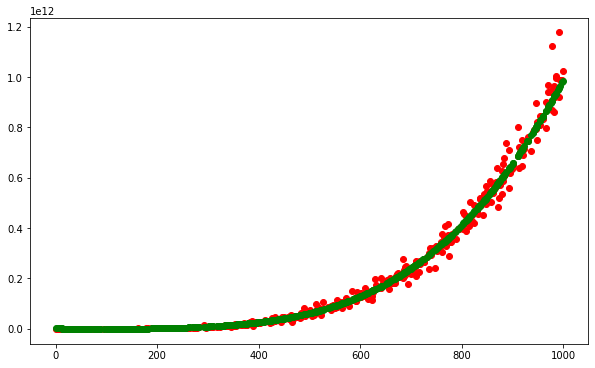

In [307]:
fig = plt.figure(figsize=(10,6))

plt.scatter(X_test, Y_test, color='r', label='true val')
plt.scatter(X_test, y_poly5_hat, color='g', label='PolynomialRegression')

In [308]:
y_poly5_train_hat = poly5.predict(X_train)

polyr5_mse_train = metric.MSE(Y_train, y_poly5_train_hat)
polyr5_mse_train

268657657636.3315

In [309]:
polyr5_mse_test = metric.MSE(Y_test, y_poly5_hat)
polyr5_mse_test

264165611266.00208

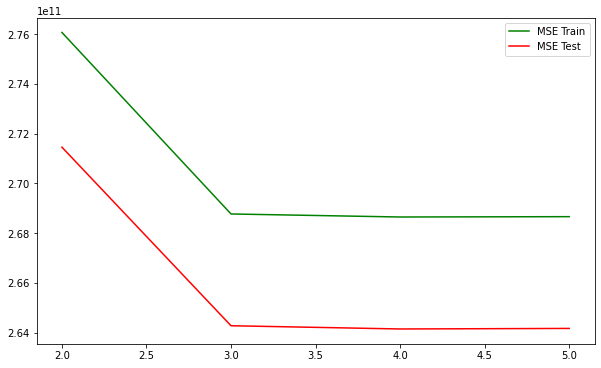

In [312]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(2,6), [polyr2_mse_train,polyr3_mse_train,polyr4_mse_train,polyr5_mse_train], color='g',label='MSE Train')
plt.plot(range(2,6), [polyr2_mse_test,polyr3_mse_test,polyr4_mse_test,polyr5_mse_test],color='r',label='MSE Test')

plt.legend()